In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import os

# Day Night

In [20]:
day = cv2.imread("Rasmlar/1.jpg")
night = cv2.imread("Rasmlar/2.jpg")
day = cv2.cvtColor(day, cv2.COLOR_BGR2HSV)
night = cv2.cvtColor(night, cv2.COLOR_BGR2HSV)
night_v = night[:,:,2]
day_v = day[:,:,2]
print(np.mean(day_v), np.mean(night_v))

158.1464713322091 88.85556070826307


In [21]:
day = cv2.imread("Rasmlar/3.jpg")
night = cv2.imread("Rasmlar/4.jpg")
day = cv2.cvtColor(day, cv2.COLOR_BGR2HSV)
night = cv2.cvtColor(night, cv2.COLOR_BGR2HSV)
night_v = night[:,:,2]
day_v = day[:,:,2]
print(np.mean(day_v), np.mean(night_v))

110.04976228587178 33.138906409006104


In [24]:
day = cv2.imread("Rasmlar/5.jpg")
night = cv2.imread("Rasmlar/6.jpg")
day = cv2.cvtColor(day, cv2.COLOR_BGR2HSV)
night = cv2.cvtColor(night, cv2.COLOR_BGR2HSV)
night_v = night[:,:,2]
day_v = day[:,:,2]
print(np.mean(day_v), np.mean(night_v))

138.94210769489248 91.89565692204302


In [25]:
if np.mean(night_v) > 100:
    print("Kun")
else:
    print("Tun")

Tun


# Glob methodi

In [8]:
a = glob.glob(os.path.join("Rasmlar/test/*"))

In [9]:
a

['Rasmlar/test\\20151101_072507.jpg',
 'Rasmlar/test\\20151101_152050.jpg',
 'Rasmlar/test\\20151101_152512.jpg',
 'Rasmlar/test\\20151101_165048.jpg',
 'Rasmlar/test\\20151101_222053.jpg',
 'Rasmlar/test\\20151101_225048.jpg',
 'Rasmlar/test\\20151101_230938.jpg',
 'Rasmlar/test\\20151101_231132.jpg',
 'Rasmlar/test\\20151101_231455.jpg',
 'Rasmlar/test\\20151101_232014.jpg',
 'Rasmlar/test\\20151101_232057.jpg',
 'Rasmlar/test\\20151101_232440.jpg',
 'Rasmlar/test\\20151101_235039.jpg',
 'Rasmlar/test\\20151102_001123.jpg',
 'Rasmlar/test\\20151102_002051.jpg',
 'Rasmlar/test\\20151102_002549.jpg',
 'Rasmlar/test\\20151102_003534.jpg',
 'Rasmlar/test\\20151102_004042.jpg',
 'Rasmlar/test\\20151102_004129.jpg',
 'Rasmlar/test\\20151102_005050.jpg',
 'Rasmlar/test\\20151102_005319.jpg',
 'Rasmlar/test\\20151102_010806.jpg',
 'Rasmlar/test\\20151102_011044.jpg',
 'Rasmlar/test\\20151102_011134.jpg',
 'Rasmlar/test\\20151102_012545.jpg',
 'Rasmlar/test\\20151102_013807.jpg',
 'Rasmlar/te

# Value bo'yicha rasmni o'qib, o'rtacha qiymatni topish

In [32]:
day = cv2.imread(a[0])
day = cv2.cvtColor(day, cv2.COLOR_BGR2HSV)
day_v = day[:,:,2]
print(np.mean(day_v))

158.1464713322091


In [19]:
os.remove("Rasmlar/tun_kun/test/day/Thumbs.db")

# Training papkasidagi rasmlarni kun-tunga ajratish

In [28]:
path_rasmlar = glob.glob("Rasmlar/tun_kun/training/*/*.jpg")
natija = []
for i in range(len(path_rasmlar)):
    rasm = cv2.imread(path_rasmlar[i])
    rasm = cv2.cvtColor(rasm, cv2.COLOR_BGR2HSV)
    rasm_v = rasm[:,:,2]
    rasm = cv2.cvtColor(rasm, cv2.COLOR_HSV2RGB)
    if np.mean(rasm_v) > 100:
        natija.append((rasm,0))
    else:
        natija.append((rasm,1))

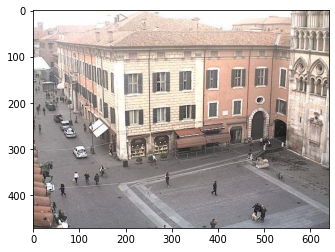

0


In [29]:
plt.imshow(natija[118][0])
plt.show()
print(natija[118][1])

# Test papkasidagi rasmlarni kun-tunga ajratish

In [28]:
path_rasmlar_test = glob.glob("Rasmlar/tun_kun/test/*/*.jpg")
natija_test = []
rasm = []
for i in range(len(path_rasmlar_test)):
    rasm_test = cv2.imread(path_rasmlar_test[i])
    rasm_test = cv2.resize(rasm_test, (850,570))
    rasm_test = cv2.cvtColor(rasm_test, cv2.COLOR_BGR2HSV)
    rasm_v_test = rasm_test[:,:,2]
    rasm_test = cv2.cvtColor(rasm_test, cv2.COLOR_HSV2RGB)
    if np.mean(rasm_v_test) > 90:
        natija_test.append((rasm_test,0))
    else:
        natija_test.append((rasm_test,1))

In [39]:
natija_test1 = list(reversed(natija_test))

In [11]:
x_size = [i.shape[1] for i in rasm]

In [12]:
y_size = [i.shape[0] for i in rasm]

In [16]:
print(np.mean(x_size))
print(np.mean(y_size))

845.075
572.38125


# Rasm raqamini kiritish orqali rasm kun yoki tun ekanini chiqarish

Rasmning raqami: 110


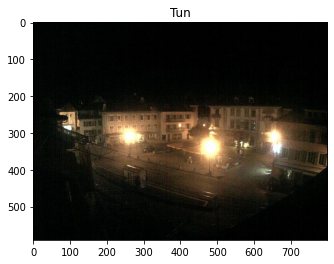

In [27]:
son = int(input("Rasmning raqami: "))
while son > len(natija_test):
    print("Bunday rasm yo'q. Qaytadan kiriting.")
    son = int(input("Rasmning raqami: "))
if natija_test[son-1][1] == 0:
    dn = "Kun"
else:
    dn = "Tun"
plt.title(dn)
plt.imshow(natija_test[son-1][0])
plt.show()

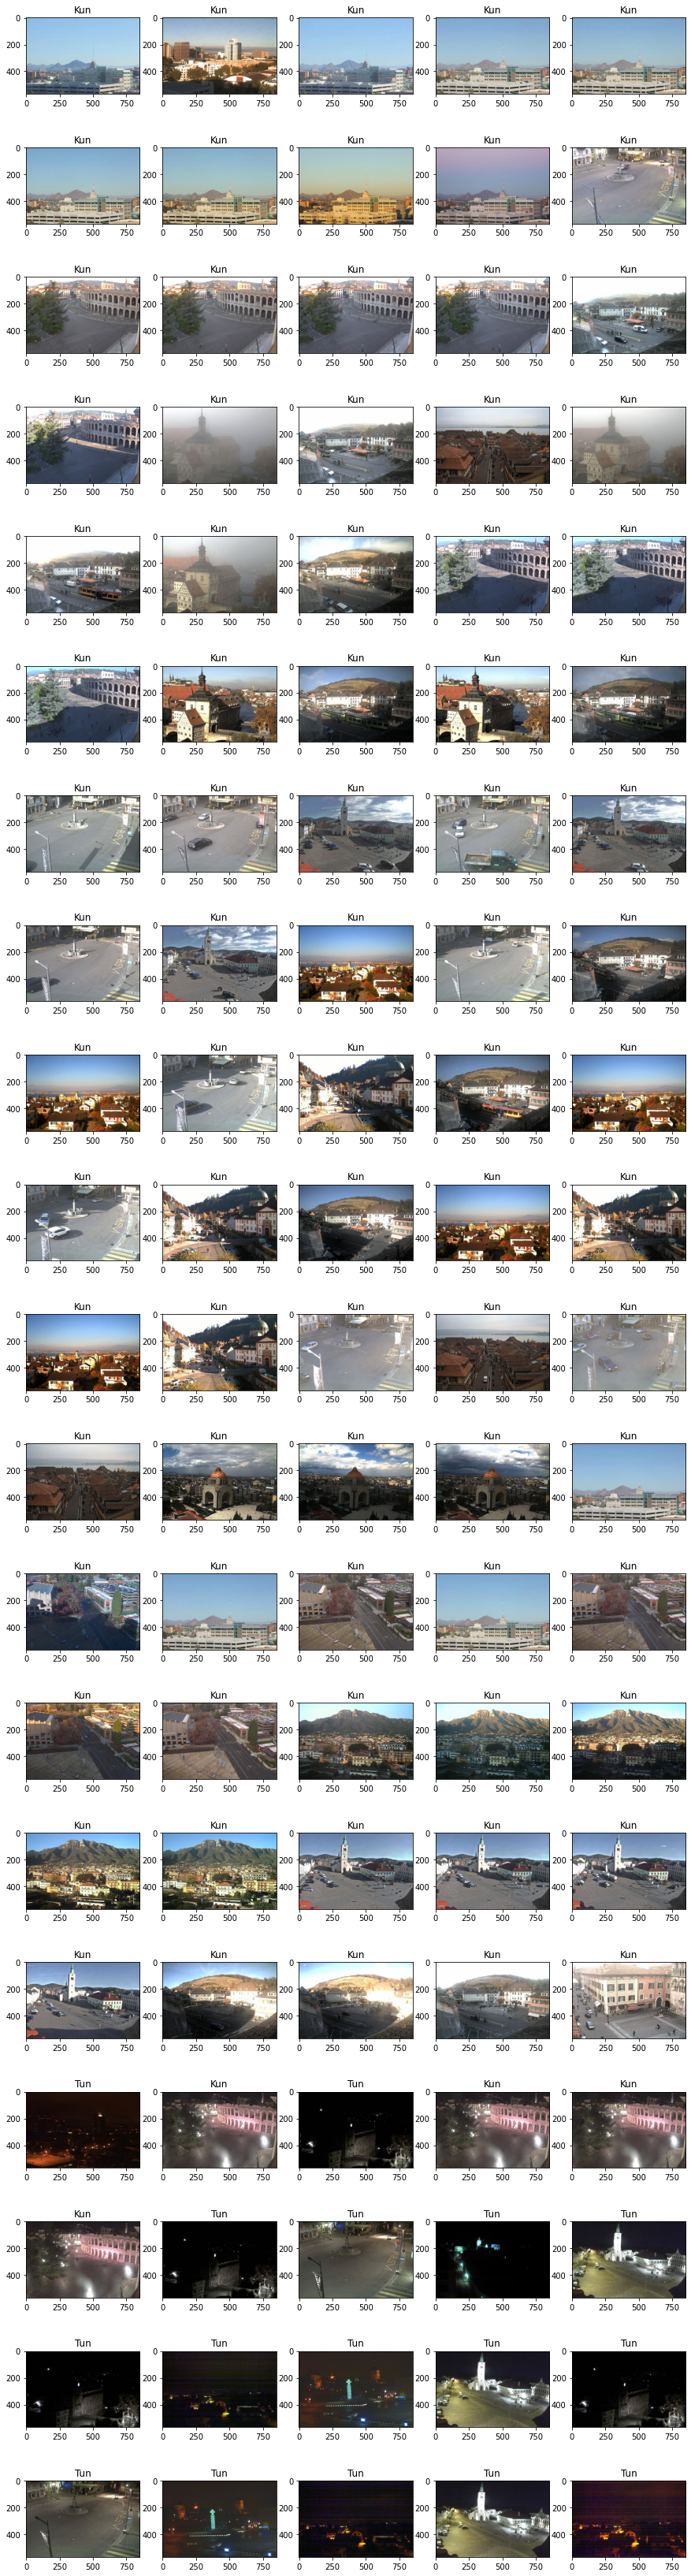

In [41]:
fig, axes = plt.subplots(5,20,figsize=(15,60))
for i in range(100):
    if natija_test[i][1] == 0:
        dn = "Kun"
    else:
        dn = "Tun"
    plt.subplot(20,5,i+1)
    plt.title(dn)
    plt.imshow(natija_test[i][0])
plt.show()

In [11]:
smile = cv2.imread("Rasmlar/t.png")
smile = cv2.cvtColor(smile, cv2.COLOR_BGR2RGB)
plt.imshow(smile)
plt.show()

In [12]:
smile.shape

(731, 860, 3)

In [21]:
%matplotlib inline

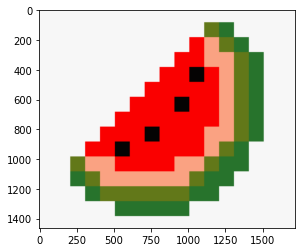

In [22]:
smile_lin = cv2.resize(smile, (1720,1462), interpolation=cv2.INTER_LINEAR)
plt.imshow(smile_lin)
plt.show()

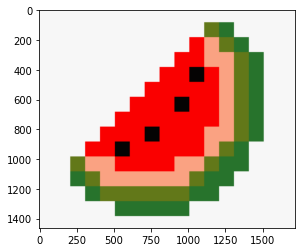

In [23]:
smile_cub = cv2.resize(smile, (1720,1462), interpolation=cv2.INTER_CUBIC)
plt.imshow(smile_lin)
plt.show()